In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import logging
import math
import time
import statistics as stats
import json
from datetime import datetime, timedelta
import os, sys
import matplotlib.pyplot as plt
import glob

In [2]:
feature_file_path = "features/vag_features.csv"

f_df = pd.read_csv(feature_file_path)
print(f_df.head())

   STATE        FD    FD_EXT    FD_FLX       VMS   VMS_EXT   VMS_FLX  \
0      1  1.466570  1.775843  1.820782  0.025042  0.019168  0.029947   
1      1  1.766607  1.627739  1.922575  0.004414  0.003966  0.003024   
2      1  1.744344  1.869978  2.031547  0.003247  0.001370  0.004936   
3      1  2.287178  2.038849  2.328853  0.000181  0.000233  0.000093   
4      1  1.343740  1.526733  1.595508  0.010186  0.006659  0.003177   

           LI      LI_EXT      LI_FLX  
0  889.089284  159.510675  184.021034  
1  631.959945  117.458492  114.770158  
2  404.492380   50.910125   95.774558  
3  261.686751  141.155890   23.514829  
4  268.935033   80.879692   60.233316  


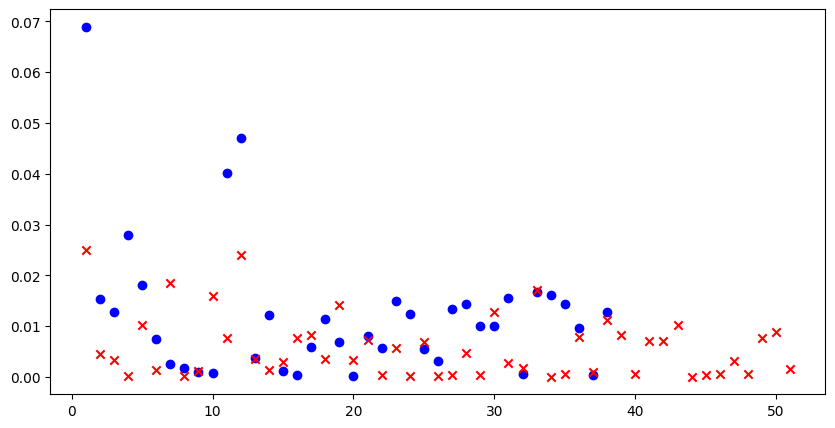

In [39]:
# Create a figure and axis
fig, ax = plt.subplots(1,1, figsize=(10, 5))

df_state_0 = f_df[f_df['STATE'] == 0]
df_state_1 = f_df[f_df['STATE'] == 1]

# Generate x-values for each state based on their positions
x_state_0 = range(1, len(df_state_0) + 1)
x_state_1 = range(1, len(df_state_1) + 1)

# Plot VMS values for state 0
ax.scatter(x_state_0, df_state_0['VMS'], color='blue', label='State 0', marker='o')

# Plot VMS values for state 1
ax.scatter(x_state_1, df_state_1['VMS'], color='red', label='State 1', marker='x')


In [9]:
#!pip install scikit-learn 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC

In [10]:
features = f_df.drop('STATE', axis=1)
y = f_df['STATE']

In [11]:
model_results = {}

for f in features.columns:
    X = f_df[[f]]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
    
    # Initialize LDA
    lda = LDA()
    
    # Fit the model
    lda.fit(X_train, y_train)
    
    # Transform the feature
    X_train_lda = lda.transform(X_train)
    X_test_lda = lda.transform(X_test)
    
    # Predict
    y_pred = lda.predict(X_test)
    # Predict the probabilities
    y_probs = lda.predict_proba(X_test)[:, 1]  # Get the probability for the positive class
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_value = roc_auc_score(y_test, y_probs)

    model_results[f] = {
        "accuracy": round(accuracy,3),
        "auc": round(float(auc_value),3),
        "predicted": y_pred,
        "actual": y_test.values
    }
print(f"{'Feature':<10} {'AUC':<8} {'Accuracy':<8}")
print()
for key, value in model_results.items():
    print(f"{key:<10} {value['auc']:<8.3f} {value['accuracy']:<8.3f}")

Feature    AUC      Accuracy

FD         0.657    0.622   
FD_EXT     0.614    0.556   
FD_FLX     0.252    0.333   
VMS        0.746    0.711   
VMS_EXT    0.700    0.644   
VMS_FLX    0.802    0.733   
LI         0.498    0.467   
LI_EXT     0.506    0.533   
LI_FLX     0.470    0.489   


In [16]:
svm_model_results = {}

for f in features.columns:
    X = f_df[[f]]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    rbf_svm = SVC(kernel='rbf', probability=True, random_state=42)
    rbf_svm.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rbf_svm.predict(X_test)
    # Predict the probabilities
    y_probs = rbf_svm.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    auc_value = roc_auc_score(y_test, y_probs)

    svm_model_results[f] = {
        "accuracy": round(accuracy,3),
        "auc": round(float(auc_value),3),
    }
print(f"{'Feature':<10} {'AUC':<8} {'Accuracy':<8}")
print()
for key, value in svm_model_results.items():
    print(f"{key:<10} {value['auc']:<8.3f} {value['accuracy']:<8.3f}")

Feature    AUC      Accuracy

FD         0.615    0.600   
FD_EXT     0.600    0.533   
FD_FLX     0.245    0.700   
VMS        0.690    0.700   
VMS_EXT    0.700    0.633   
VMS_FLX    0.740    0.700   
LI         0.405    0.667   
LI_EXT     0.655    0.633   
LI_FLX     0.270    0.600   
